# Manoeuvres d'un satellite autour de la Terre

**Modélisation Numérique en Physique - S2**

**ARGUELLO Camilo**

**SINNATHAMBY Thushara**

## Tableau

1. Introduction
2. Trajectoire elliptique d'un satellite
 - 2.1 - Présentation mathématiques du problème
 - 2.2 - Modélisation de la trajectoire de l'orbite
 - 2.3 - Etude de l'excentricité
 - 2.4 - Analyse des erreurs avec Odeint, Euler et RK4

3. Analyse de la vitesse du satellite
4. Conclusion

## 1 - Introduction 

Un satellite est mis en orbite autour de la Terre. L'objectif de ce projet est d'étudier sa trajectoire elliptique et sa vitesse. 

Dans un premier temps, on va étudier la trajectoire du satellite à l'aide de différentes lois mathématiques. Puis, on modélisera cette trajectoire à l'aide de trois méthodes équivalentes de résolution numérique d'équation différentielle : Odeint, Euler et RK4. Pour compléter notre étude, on calculera l'excentricité et on fera une analyse des erreurs selon les trois méthodes utilisées.

Dans un second temps, on s'intéressera à la vitesse du satellite mis en orbite autour de la Terre. 
On étudieras également l'impulsion donnée par le satellite sur un intervalle de temps donné. 


## 2 - Trajectoire elliptique d'un satellite

## 2.1 - Présentation mathématiques du problème  

### *Comment détermine-t-on la trajectoire elliptique d’une orbite par rapport à la Terre ?*    
### *A partir de quelle lois mathématiques peut-on la calculer ?* 

Tout d'abord, on cherche à décrire le mouvement d'un satellite (de masse $m_1$) qui tourne autour de la Terre (de masse $ m_2 $).    
Pour étudier ce mouvement, on se place dans un référentiel Galiléen, en considérant un problème à un corps.

On pose $ \vec{r} $ le vecteur position du corps 1 (Satellite) par rapport au corps 2 (Terre) : $$ \vec{r} = \vec{r_1} - \vec{r_2} $$

La seule force qui intervient est le poids **P** auquel est soumis le satellite.
Le poids du satellite est assimilé à la force d'attraction gravitationnelle $ \vec{F_{1/2}} $ qu'exerce la Terre sur ce satellite :  

$$ \vec{F_{1/2}} = -\frac{G.m_1.m_2}{(\vec{r_1} - \vec{r_2})^3}.(\vec{r_1} - \vec{r_2}) $$

On introduit la masse réduite : $ µ = \frac{m_1.m_2}{m_1+m_2} $ et la masse totale : $ M = m_1 + m_2 $ 

En simplifiant, on obtient la force $$ \vec{F_{1/2}} = -\frac{G.µ.M}{\vec{r}^3}. \vec{r} $$ 

D'après la troisième loi de Newton, la force gravitationnelle exercée par le satellite (corps 1) sur la Terre (corps 2) devient :  
$$ \vec{F_{2/1}} = - \vec{F_{1/2}}   $$

De plus, la deuxième loi de Newton (PFD) permet de poser :

$$ \sum_i \vec{F_i} = m . \vec{a} $$ 

Alors : $$  m_1. \frac{d^2r_1}{dt^2} = \vec{F(r)}  $$

$$    m_2. \frac{d^2r_2}{dt^2} = - \vec{F(r)}  $$

En sommant et soustrayant ces deux expressions, nous obtenons :
$$ M. \frac{d^2R}{dt^2}  = 0  $$

$$  µ. \frac{d^2r}{dt^2}  = \vec{F(r)}  $$ 

Avec **R** = $ \frac{m_1r_1 + m_2r_2}{m_1+m_2} $, la position du centre de masse du système.                                    


**On détermine alors la trajectoire elliptique d'une orbite, par rapport à la Terre, à l'aide des équations de mouvement :**

$$  \frac{dx}{dt} = v_x     $$

$$   \frac{dy}{dt} = v_y    $$ 

$$   \frac{dv_x}{dt} = -\frac{G.m.x}{(x^2 + y^2)^{3/2}}  $$ 

$$  \frac{dv_y}{dt} = -\frac{G.m.y}{(x^2 + y^2)^{3/2}}   $$ 


A partir de ces équations de mouvement, on peut en déduire la période de révolution T :

$$
T^2 = \frac{4 \pi^2 }{G M} a^3
$$

Il s'agit de la troisième loi de Kepler, la loi des périodes. 
Cette expression permet de déterminer la distance satellite-Terre, si on connaît la période de révolution. 

Pour simplifier le problème, on utilisera des valeurs de distance et de temps en unités astronomiques (`1 UA = 1.50e11 m`) et on négligera la valeur de la masse, qui est très faible. Cette approche permet d'étudier la trajectoire de l'orbite sans se soucier d'un quelconque problème d'échelle. 


## 2.2 - Modélisation de la trajectoire de l'orbite 

### *Quelle(s) méthode(s) peut-on utiliser pour modéliser la trajectoire elliptique de l’orbite ?*

On peut modéliser la trajectoire d'une orbite à l'aide des fonctions Odeint, Euler et RK4. Ces différentes méthodes de résolution numérique prennent en compte des conditions initiales précises du système.        
Ces conditions initiales peuvent être manuellement ajustées sur le codage afin de visualiser la trajectoire de l'orbite. On pourras alors ajuster les valeurs de la position et de la vitesse initiale. 

La force auquel est soumis le satellite est une force centrale. Cela entraîne alors la conservation de l'énergie mécanique et du moment cinétique.

On pose l'expression de l'énergie mécanique : 
$$ E = T + U $$ (Avec $T$ l'énergie cinétique et $U$ l'énergie potentielle).
                                        
$$
E = \frac{1}{2} m \vec{v}^2 + \frac{-G M}{\sqrt{x^2+y^2}}
$$

Et du moment cinétique : 
$$ 
L = x.v_y - y . v_x
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
import pandas as pd

Selon la troisieme loi de Kepler: 

$$
\frac{T^2}{a^3} = \frac{4\pi^2}{MG}
$$


le carré de la période orbitale d'une planète est proportionnel au cube de la longueur du demi-grand axe de son orbite, c'est à dire $T^2 = a^3$. Avec une masse négligeable, on peut écrire:

$$
G = 4\pi^2
$$

In [ ]:
# Données nécessaires pour le problème
# G = 6.67e-11          # m3 kg-1 s-2
# D'après kepler, on suppose que : T^2 = a^3
a = 1 # U.A
T_rev = 1 # ans
G = 4 * np.pi ** 2

In [ ]:
# On définit la position initiale et la vitesse
r_0 = 1.0 # rayon de l'orbite
M = 1.0 # Masse 
v = np.sqrt(G * M / r_0)   

print(v)

6.283185307179586


In [ ]:
# Définition de la fonction derivee
def derivee(v,t):
    """
    @description   Soit v = (x,y,vx,vy)
                Équation du mouvement: d(x,y,vx,vy)/dt = (vx,vy,-gx,-gy)
                avec g = -GM/(x^2+y^2)^3
    @returns d(x,y,vx,vy)/dt
    """
    # Initialisation de la dérivée
    dv = np.empty(v.shape)
    # Dérivée de la vitesse
    dv[0] = v[2]
    dv[1] = v[3]
    r = np.sqrt( v[0] ** 2 + v[1] ** 2 )
    dv[2] = -( G * M * v[0] ) / r ** 3
    dv[3] = -( G * M * v[1] ) / r ** 3

    return dv

In [ ]:
# Coditions initiales 
# Position initiale
x_0 = 1 # AU
y_0 = 0 # AU

# Vitesse initiale
v_x_0 = 0 # AU/year
v_y_0 = 4 # AU/year

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

t0 = 0.
tf = 2 # 10 years
tau = .00001 # year

In [ ]:
### Modélisation des trajectoires selon les 3 méthodes de résolution numérique d'équation différentielle
### Calculs de l'énergie mécanique et du moment cinétique

def get_mecanic_energy (x,y,vx,vy):
  """
  @description Énergie mécanique = Énergie Cinetique (T) + Énergie potentielle (U)
  @returns Énergie mécanique du systeme
  """
  T = (1/2) * M * (vx ** 2 + vy ** 2)
  U = - G * M / np.sqrt(x ** 2 + y ** 2)
  return T + U

def get_momentum (x,y,vx,vy):
  """
  @description Moment cinétique
  """
  L = x * vy - y * vx
  return L

def plot_trajectory(x,y, trajectory_type='odeint', e=0):
  """
  @description Plot la trajectoire selon la position x et y
  """
  plt.title(r'Using ' + trajectory_type + ' with $x$ = %g, $v_y$ = %g, and $step$ = %g' \
    % (x_0,v_y_0,tau))
  plt.plot(x,y, label='e:'+str(np.around(e,2)))
  centerx = 0.
  centery = 0.
  plt.plot(centerx,centery,'ko', label='foyer')
  plt.axis('equal')
  plt.grid()


def plot_energy(t,E):
  """
  @description Plot l'énergie mecanique du système
  """
  plt.title('Energie Mécanique')
  plt.plot(t,E)
  plt.ylabel('E/m')
  plt.grid()

def plot_momentum(t,L):
  """
  @description Plot le moment cinétique du système
  """
  plt.title('Momentum')
  plt.plot(t,L)
  plt.ylabel('L/m')
  plt.grid()
  plt.xlabel('t')


def merge_lists(list1, list2):
  """
  @helper Cette fonction mélange deux listes dans une seule, l'objectif c'est diminuer la complexité et le temps,
          lorsque on veut comparer des points avec l'origin, il faut mieux comparer par pairs (x,y)
  @returns {List}
  """
  merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
  return merged_list


def get_apogee_perigee(points):
  """
  @description Cette fonction donne selon le calcule de distances de satellite par rapport le foyer, la position dans l'apogée, ainsi qu'au périgée
                - Dans notre exemple le foyer se trouve à (0,0)
  """
  distances_to_foyer = [(np.linalg.norm(np.array((p[0],p[1])) - np.array((0,0)))) for p in points]
  i_max = np.argmax(distances_to_foyer)
  i_min = np.argmin(distances_to_foyer)

  apogee = points[i_max]
  perigee = points[i_min]

  return apogee, perigee


def get_center_ellipse(apogee, perigee):
  """
  @description Cette fonction donne le centre de l'ellipse en coordonnées cartesiennes (x,y)
  """
  med_x = (apogee[0] + perigee[0]) / 2
  med_y = (apogee[1] + perigee[1]) / 2
  center = np.array((med_x,med_y))
  return center


def get_line_equation(x, apogee,perigee):
  """
  @description Cette fonction permettre de calculer l'équation d'une droite
  """
  # y = x * m + b
  # slope
  m = (apogee[1] - perigee[1]) / (apogee[0] - perigee[0])
  y = x * m 
  return y, m


def get_perpendicular_line_equation (x, m, center):
  """
  @description Cette fonction donne l'équation de la droite perpeticulaire à celle de la fonction `get_line_equation(..)`
  """
  ## perpendicular
  m_inv = - 1 / m
  b_inv = center[1] - ( m_inv * center[0])
  y_inv = m_inv * x + b_inv 
  return y_inv 


def get_excentricity(points):
  """
  @description Cette fonction calcule l'excentricité selon la trajectoire faite par le satellite
  """
  apogee, perigee = get_apogee_perigee(points)
  med_x = (apogee[0] + perigee[0]) / 2
  med_y = (apogee[1] + perigee[1]) / 2
  medium = np.array((med_x,med_y))

  distances_to_center = [(np.linalg.norm(np.array((p[0],p[1])) - medium)) for p in points]

  # demi grand et petit axes
  a = np.max(distances_to_center)
  b = np.min(distances_to_center)

  if a > b:
    c = np.sqrt(a ** 2 - b ** 2)
  else:
    c = np.sqrt(a ** 2 + b ** 2)

  e = c / a

  return e

    
def Euler(start, end, step, v_ini, derivee, ordre=4):
    '''
        Application de la méthode d'Euler
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        v[:, i + 1] = v[:, i] + step * derivee(v[:, i], t[i])

    # Argument de sortie
    return t, v

def rk4(start, end, step, v_ini, derivee, ordre=4):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i])
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2)
        d4 = derivee(v[:, i] + step * d3, t[i] + step)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
    return t, v

def compare_energy (methodes):
  """
  @description Plot les énergies pour les trois méthodes
  """
  plt.plot(methodes['Odeint']['t'],methodes['Odeint']['E'], label='Odeint')
  plt.plot(methodes['Euler']['t'],methodes['Euler']['E'], label='Euler')
  plt.plot(methodes['RK4']['t'],methodes['RK4']['E'], label='RK4')
  plt.axis()
  plt.ylabel('E/m')
  plt.xlabel('Temps')
  plt.legend()
  plt.show()

def calculate_trajectory(x,y,vx,vy,t,methode_name):
  """
  @description Selon les valeurs trouvés par le modéle, on peut calculer l'énergie, le moment cinetique, ainsi que l'excentricité
                - Dans cette fonction on les obtients, et on les montre à l'aide des fonctions helpers
  """

  E = get_mecanic_energy(x,y,vx,vy)
  points = merge_lists(x,y)
  e = get_excentricity(points)
  L = get_momentum(x,y,vx,vy)
  # steps
  _x = np.arange(-0.5,1.5,.01)
  apogee, perigee = get_apogee_perigee(points)
  center = get_center_ellipse(apogee,perigee)
  _y, m = get_line_equation(_x,apogee,perigee)
  _y_inv = get_perpendicular_line_equation(_x,m, center)
  
  plt.subplot(3,1,1)
  plot_trajectory(x,y,trajectory_type=methode_name, e=e)
  #plt.plot(_x,_y)
  #plt.plot(_x,_y_inv)
  plt.plot(center[0],center[1],".", label="center")
  plt.legend()
  
  plt.subplot(3,1,2)
  plot_energy(t,E)

  plt.subplot(3,1,3)
  plot_momentum(t,L)

  plt.tight_layout(h_pad=.1)
  plt.subplots_adjust(top=1.5)
  plt.show()

  print("L'excentricité de l'orbite e=", e)

  return E, L, e

def thread_odeint(methode_name):
  """
  @description Pour trouver la trajectoire avec la méthode Odeint
  """
  t = np.arange(t0, tf, tau)
  X = odeint(derivee, X0, t)
  x = X[:,0] 
  y = X[:,1]
  vx = X[:,2] # values at any given time index
  vy = X[:,3]
  E,L,e = calculate_trajectory(x,y,vx,vy, t,methode_name)
  return E,L,e,t

def thread_experimental(methode,methode_name):
  """
  @description Pour trouver la trajectoire avec les méthodes: RK4 et Euler
  """
  t, X = methode(t0, tf, tau, X0, derivee)
  x = X[0,:] 
  y = X[1,:]
  vx = X[2,:] # values at any given time index
  vy = X[3,:]
  E,L,e = calculate_trajectory(x,y,vx,vy, t,methode_name)
  return E,L,e,t

def main():
  """
  Main function pour lancer l'application
  """
  # Parameters for Odeint
  methode_name='Odeint'
  E_odeint,L_odeint,e_odeint,t_odeint = thread_odeint(methode_name)

  # Parameters for Euler
  methode_name='Euler'
  E_euler,L_euler,e_euler,t_euler = thread_experimental(Euler,methode_name)

  # Parameters for RK4
  methode_name='RK4'
  E_rk4,L_rk4,e_rk4,t_rk4 = thread_experimental(rk4,methode_name)

  # Dict with the bunch of arrays for each method
  summary_methodes = {
      'Odeint': {
          'E': E_odeint,
          'L': L_odeint,
          'e': e_odeint,
          't': t_odeint
      },
      'Euler': {
          'E': E_euler,
          'L': L_euler,
          'e': e_euler,
          't': t_euler
      },
      'RK4': {
          'E': E_rk4,
          'L': L_rk4,
          'e': e_rk4,
          't': t_rk4
      }
  }
  return summary_methodes

A partir de certaines conditions initiales de position et de vitesse, en coordonnées cartésiennes, on peut trouver la trajectoire estimée du satellite. 

On analyse ensuite la trajectoire, l'énergie, ainsi que le moment cinétique à l'aide des trois méthodes `odeint`, `Euler`, et `RK4` :

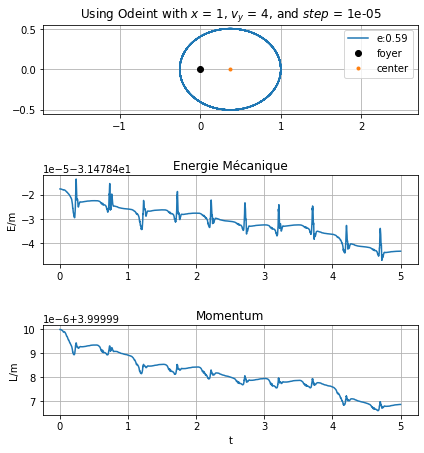

L'excentricité de l'orbite e= 0.5947910146895068


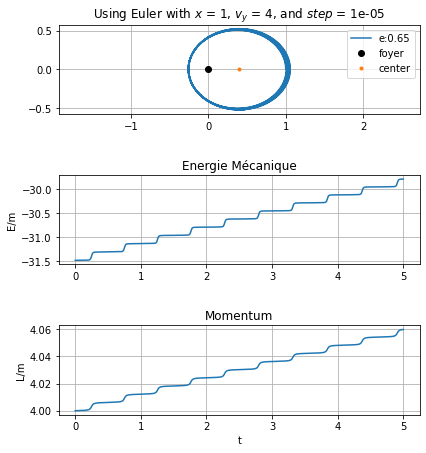

L'excentricité de l'orbite e= 0.6509226324168935


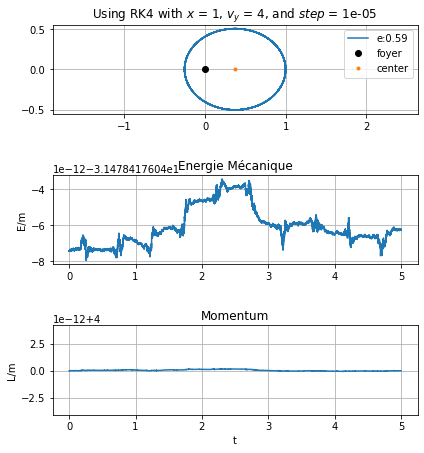

L'excentricité de l'orbite e= 0.5947172976108126


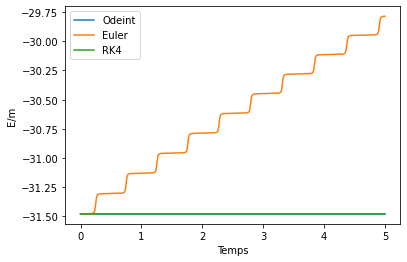

In [ ]:
# Position initial UA
x_0 = 1; y_0 = 0; v_x_0 = 0; v_y_0 = 4

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

tf = 5 # years
tau = .00001 # year

summary_methodes = main()
compare_energy(summary_methodes)

On en conclut que les trois méthodes de résolution numérique d'équation différentielle sont similaires, à condition de prendre des pas très petits pour la méthode d'Euler.  

L'énergie mécanique et le moment cinétique se conservent. On peut voir de légères variations sur une échelle très petite, de l'ordre de $10^{-5}$. En réalité, cette échelle est encore plus faible, mais on ne peut pas la représenter avec notre version Python. 

## 2.3 - Etude de l'excentricité

Les trajectoires associées à une interaction newtonienne sont des coniques.  
On peut alors déterminer la nature de la conique-trajectoire en fonction de la valeur de l'excentricité : 
- Trajectoire elliptique : $0 < e < 1$
- Trajectoire circulaire : $e = 0$
- Trajectoire hyperbolique : $e > 1$
- Trajectoire parabolique : $e = 1$ 

**On schématise le problème :**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Ellipse_foyer_directrice2.svg/660px-Ellipse_foyer_directrice2.svg.png" style="display:block;margin:auto;width:400px" />

Avec : 
- **(d)** : La directrice          
- **F** : Le foyer 
- **M** : Un point de l'ellipse 
- **d** : La distance du point M au foyer F. 

On peut alors en déduire l'expression de l'excentricité $e$ :  

$$
e = \frac{d(M,F)}{d(M,(d))}
$$


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/EllipseVal.svg/880px-EllipseVal.svg.png" style="display:block;margin:auto;width:400px" >

Le calcul de l'excentricité prend en compte **plusieurs grandeurs** : 
- **a** : Le demi grand-axe
- **b** : Le demi petit-axe
- **c** : La distance entre le centre O et le foyer F
- **h** : La distance avec la directrice (d) et le foyer F
- **e** : L'excentricité $\in [0,1]$ 
- **p** : Le demi lactus rectum

On obtient alors l'équation de l'ellipse : 

$$
\left( \frac{x}{a} \right)^2 + \left( \frac{y}{b} \right)^2 = 1
$$

Avec $a \gt b \gt 0 $.

La distance du centre jusqu'au foyer : 

$$
c = \sqrt{a^2 - b^2} 
$$

L'excentricité $e$:

$$
e = \frac{c}{a} = \frac{ \sqrt{a^2 - b^2} }{a}
$$


A partir d'une analyse des excentricités fournies par un nombre `n` de conditions initiales données, on peut calculer celle qui correspond le mieux aux résultats attendus (*Moins de perte d'énergie et de mouvement elliptique*). Pour cela, on utilise la fonction `curve_fit`, qui nous permettra d'obtenir les meilleurs paramètres du modèle.


In [ ]:
## MEASURE OF ECCENTRICITY WITH DIFFERENT INITAL CONDITIONS
## FROM X & Y CLOSEST TO 0 -> UNTIL VALUES BIGGER THAN 10 FOR BOTH
## WE CONSIDER THE SAME STEP RATE

def quadmodel(x, a, b, c, d):
  """
  @description Fonction quadratique pour trouver les meilleurs conditions initiales avec `curve_fit`
                - Lorsqu'on a 4 parametres à trouver (a,b,c,d), on a une fonction de la forme: ax3 + bx2 + cx + d
                - a = x_0, b = y_0, c = v_x_0, d = v_y_0
  """
  return (a * (x ** 3)) + (b * (x ** 2)) + (c * x) + d

def get_list_eccentricities (positions_initiales, methode_function=Euler, methode_name='Euler'):
    """
    @description This function calculates the eccentricity for a set of a random input values, the goal is to obtain an eccentricity value that minimise the Energy
                    - We do not consider the eccentricities >= 1, because we want to analyse only elliptical trajectories
    @returns {Array} eccentricities
    @returns {Array} steps 
    @returns {Array} rg -> Best input values
    @returns {Array} ymod -> Model to fit the eccentricity values
    """

    eccentricities = list()
    candidates_positions = list()
    
    for pos in positions_initiales:
        if pos[0] == 0 and pos[1] == 0:
            continue
        
        # Position initial UA
        x_0 = pos[0]; y_0 = pos[1];v_x_0=pos[2];v_y_0=pos[3]
        X0 = [ x_0, y_0, v_x_0, v_y_0 ]
        
        tf = 2 # years
        tau = 0.0001 # year

        if methode_name == "Odeint":
            print('Odeint')
            t = np.arange(t0, tf, tau)
            X = odeint(derivee, X0, t)
            x = X[:,0];y = X[:,1]
        else:
            _, X = methode_function(t0, tf, tau, X0, derivee)
            x = X[0,:];y = X[1,:]

        points = merge_lists(x,y)
        e = get_excentricity(points)
        
        # We do only consider the eccentricities smaller than 1 to analyse only the elliptical/circular trajectory only 
        if e >= .99:
            continue

        eccentricities.append(e)
        candidates_positions.append(X0)

    eccentricities = np.array(eccentricities)
    candidates_positions = np.array(candidates_positions)

    # As candidates_positions.shape has 4 subitems for each item (shape -> (n,4)) and eccentricities is the shape (n,) we create a new array to store the x values for plotting purposes
    steps = np.arange(0,len(eccentricities)) 
    # The curve_fit applied to eccentricities to find later a minimul value
    rg, _ = curve_fit(quadmodel, steps, eccentricities)
    ymod = quadmodel(steps, *rg)

    return eccentricities, steps, rg, ymod

def plot_eccentricities(eccentricities, steps, ymod):
    """
    @description Plot un ensemble d'excentricités avec le model quadratique
    """
    plt.plot(steps, eccentricities, 'k+', label='data')
    plt.plot(steps, ymod, 'b', label='model')
    plt.title('Method: ' + methode_name)
    plt.ylabel('Excentricité')
    plt.xlabel('Position initiale')
    plt.grid()
    plt.legend()
    plt.show()

def find_minima(eccentricities):
    """
    @description This algorithm finds a set of local minima in the array of eccentricties
                - The goal is to classify the eccentricites to predict a good candidate for initial variables X0
    """

    # We find the index minimum (array)
    min_arg_01 = argrelextrema(eccentricities, np.less)
    mins_positions = positions_initiales[min_arg_01]

    positions = list()
    for position in mins_positions:
        # Avoid positions 0 to have errors in derivatives
        if position[0] == 0 and position[1] == 0:
            continue
        positions.append(position)
        
    positions = np.array(positions)
    return positions

def get_best_candidate_position (method_function, eccentricities):
    """
    @description This function returns a candidate to be the best initial parameter for the X0 array
                    - It calculates the minimum from the eccentricities
                    - It iterates to analyse the lowest energy difference (Because we are interested in the most conservative mouvement)
    @returns    An array with the best values for x_0,y_0,v_x_0,v_y_0
    """

    possible_positions = find_minima(eccentricities)
    
    diffs_E = list()

    # Re set initial variables to only test this scenario
    t0 = 0
    tf = 2
    tau = 0.0001

    for p in possible_positions:
        x_0 = p[0]; y_0 = p[1]; v_x_0 = p[2]; v_y_0 = p[3]
        X0 = [ x_0, y_0, v_x_0, v_y_0]
        
        _, X = method_function(t0, tf, tau, X0, derivee)
        x = X[0,:]; y = X[1,:]; vx = X[2,:]; vy = X[3,:]

        E = get_mecanic_energy(x,y,vx,vy)
        diff_E = np.abs(np.max(E) - np.min(E))

        diffs_E.append(diff_E)

    diffs_E = np.array(diffs_E)
    i_min_E = np.argmin(diffs_E)

    return possible_positions[i_min_E]


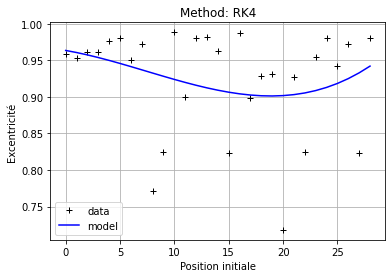

Value found to be X0 =  [1 3 3 1]


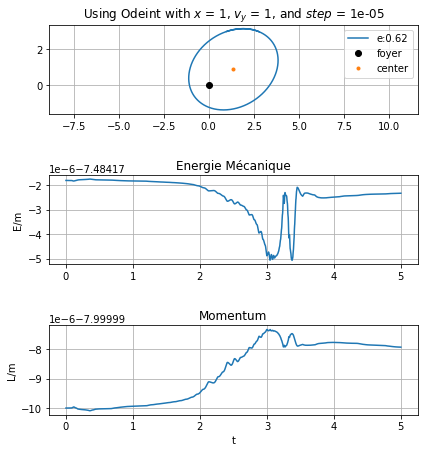

L'excentricité de l'orbite e= 0.6207653204669912


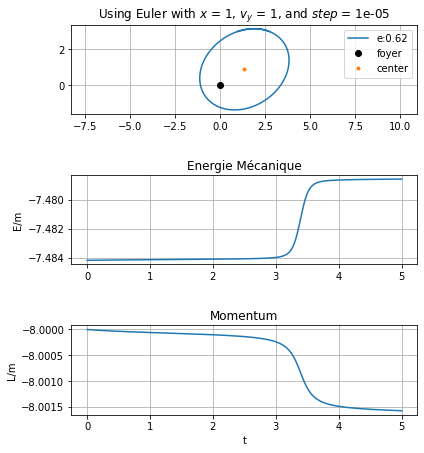

L'excentricité de l'orbite e= 0.6208287432993747


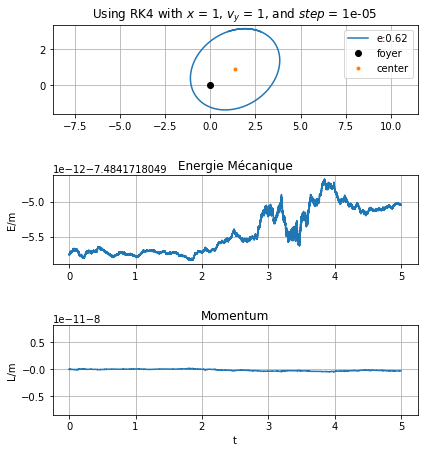

L'excentricité de l'orbite e= 0.6207656690386063


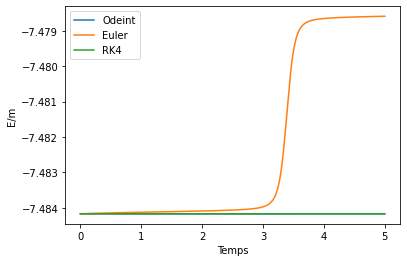

In [ ]:

# Analysis of eccentricites with a set random input values of x,y,vx,vy
iter = 50 # how many X0 we will create
positions_initiales = np.random.randint(0,4, size=(iter,4))

#methode_name = 'Euler'
#eccentricities, steps, rg, ymod = get_list_eccentricities(positions_initiales,Euler,methode_name)
#plot_eccentricities(eccentricities, steps, ymod)

methode_name = 'RK4'
methode_function = rk4
eccentricities, steps, rg, ymod = get_list_eccentricities(positions_initiales,methode_function,methode_name)
plot_eccentricities(eccentricities, steps, ymod)
candidate_X0 = get_best_candidate_position(methode_function,eccentricities)

print("Value found to be X0 = ",candidate_X0)

## Re plotting

# Position initial UA
x_0 = candidate_X0[0]
y_0 = candidate_X0[1]
v_x_0 = candidate_X0[2]
v_y_0 = candidate_X0[3]

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

tf = 5 # years
tau = .00001 # year

summary_methodes = main()
compare_energy(summary_methodes)

La fonction `quadmodel` prend en entrée quatre valeurs : `a`, `b`, `c` et `d`, qui sont choisis aléatoirement parmi des valeurs comprises entre `0` à `n=50`.         
Ces quatre valeurs permettent d'estimer les conditions initiales (`x_0,y_0,v_x_0,v_y_0`). Le principe repose sur le choix d'un minimum local d'excentricité que l'on compare aux valeurs donnant les plus petites variations de l'énergie mécanique et du moment cinétique. 
Cette fonction permet de choisir la valeur idéale parmi les `50`. 
On peut retrouver ces valeurs à l'aide de la fonction `curve_fit`.

La valeur de l'excentricité varie bien entre `0` et `1`.  




## 2.4 - Analyse des erreurs avec Odeint, Euler et RK4

On va analyser la précision des trois méthodes en étudiant l'énergie mécanique `E` et le moment cinétique `L`. Pour cela, on compare différentes valeurs de pas, variant de `0,1` à `0,000001`, qui correspondent à différentes valeurs de conditions initiales.



In [ ]:
def get_energy_analysis_steps (methode_function, methode_name='Euler', iter=7):
    """
    @description On fait une analyse de chaque méthode et sa précision avec différents pas
    """
    steps_label = list()
    eccentricities = list()
    energies = list()
    momentums = list()

    if iter <= 1:
        return None,None,None,None,None

    for i in range(1,iter):
        tf = 3 # years
        tau = 1 / 10 ** i # year
        print("step:", tau)
        if methode_name == "Odeint":
             t = np.arange(t0, tf, tau)
             X = odeint(derivee, X0, t)
             x = X[:,0];y = X[:,1];vx = X[:,2];vy = X[:,3]
        else:
            _, X = methode_function(t0, tf, tau, X0, derivee)
            x = X[0,:];y = X[1,:];vx = X[2,:];vy = X[3,:] 
        
        E = get_mecanic_energy(x,y,vx,vy)
        points = merge_lists(x,y)
        e = get_excentricity(points)
        L = get_momentum(x,y,vx,vy)
        steps_label.append(tau)
        eccentricities.append(e)
        energies.append({
            'error': np.abs(np.max(E) - np.min(E)),
            'mean' : np.array([np.mean(E)]),
            'label' : 'step:' + str(tau)
        })
        momentums.append({
            'error': np.abs(np.max(L) - np.min(L)),
            'mean' : np.array([np.mean(L)]),
            'label' : 'step:' + str(tau)
        })

    energies = np.array(energies)
    eccentricities = np.array(eccentricities)
    momentums = np.array(momentums)
    steps = np.arange(0, len(eccentricities))

    return energies, eccentricities, momentums, steps, steps_label

def plot_energy_analysis_steps(energies, eccentricities, momentums, steps, steps_label, methode_name='Euler'):
    """
    @description Plot l'analyse de steps
    """
    if energies is None:
        return print("There was an error")

    fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(14,3))

    ax0.plot(steps, eccentricities, '+k')
    ax0.set_ylabel('excentricité')

    for i,energy in enumerate(energies):
        _x = np.arange(len(energy['mean'])) + i
        ax1.errorbar(_x,energy['mean'], yerr=energy['error'], marker = '+', linestyle = '')

    for i,momentum in enumerate(momentums):
        _x = np.arange(len(momentum['mean'])) + i
        ax2.errorbar(_x,momentum['mean'], yerr=momentum['error'], marker = '+', linestyle = '')

    ax1.set_ylabel('Error E/m')
    ax2.set_ylabel('Error L/m')

    ax1.set_title('Analyse des pas avec ' + methode_name)

    ax0.set_xticks(steps,steps_label)
    ax1.set_xticks(steps,steps_label)
    ax2.set_xticks(steps,steps_label)

    ax0.set_xlabel('Pas')
    ax1.set_xlabel('Pas')
    ax2.set_xlabel('Pas')

    plt.show()

step: 0.1
step: 0.01
step: 0.001
step: 0.0001
step: 1e-05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


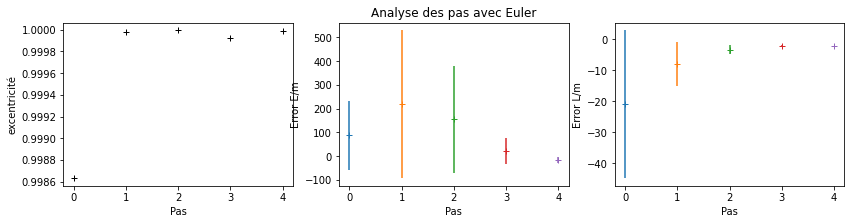

In [ ]:
# Position initial UA
x_0 = 1; y_0 = 1; v_x_0 = 2; v_y_0 = 0

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

methode_name = 'Euler'
methode_function = Euler
iter = 6

energies, eccentricities, momentums, steps, steps_label = get_energy_analysis_steps(methode_function, methode_name, iter)
plot_energy_analysis_steps(energies, eccentricities, momentums, steps ,steps_label, methode_name)

step: 0.1
step: 0.01
step: 0.001
step: 0.0001
step: 1e-05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


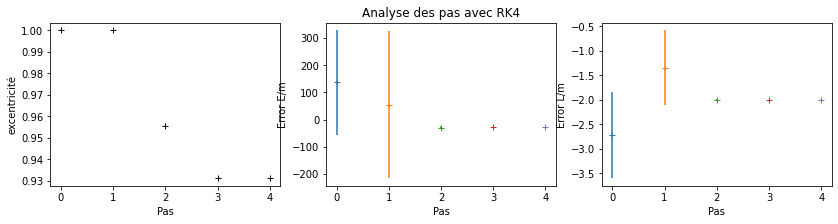

In [ ]:
# Position initial UA
x_0 = 1; y_0 = 1; v_x_0 = 2; v_y_0 = 0

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

methode_name = 'RK4'
methode_function = rk4
iter = 6

energies, eccentricities, momentums, steps, steps_label = get_energy_analysis_steps(methode_function, methode_name, iter)
plot_energy_analysis_steps(energies, eccentricities, momentums, steps ,steps_label, methode_name)

step: 0.1
step: 0.01
step: 0.001
step: 0.0001
step: 1e-05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


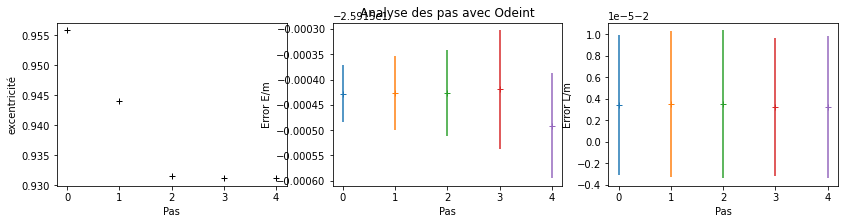

In [ ]:
# Position initial UA
x_0 = 1; y_0 = 1; v_x_0 = 2; v_y_0 = 0

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

methode_name = 'Odeint'
methode_function = odeint
iter = 6

energies, eccentricities, momentums, steps, steps_label = get_energy_analysis_steps(methode_function, methode_name, iter)
plot_energy_analysis_steps(energies, eccentricities, momentums, steps ,steps_label, methode_name)

On peut en conclure que :

-  La méthode `odeint` est notre méthode de résolution de référence du fait de sa précision numérique.
Afin d'observer les possibles variations de l'énergie mécanique et du moment cinétique, nous avons utilisé une précision numérique de l'ordre de $10^{-5}$. 

- La méthode `Euler` est moins précise que la méthode Odeint. Il faut alors prendre des pas très petits afin d'observer la trajectoire elliptique d'une orbite.

- La méthode `RK4` est plus précise que celle d'Euler avec les mêmes conditions initiales et des pas très petit, de l'ordre de `0.01`.





## 3 - Analyse de la vitesse du satellite

###*Comment la vitesse du satellite modifie la trajectoire de l’orbite ?*

La vitesse donnée au satellite est importante car elle va déterminer la trajectoire de l’orbite.        
Pour qu’un satellite conserve sa vitesse, il faut que celui-ci se déplace à une certaine altitude et à une certaine vitesse. Il n’y a alors pas de force de frottement et l'apport en énergie n'est pas nécessaire pour maintenir le mouvement du satellite en orbite.

Dans une orbite elliptique nous pouvons déterminer deux points de l'orbite où la vitesse varie : 
- A l'apogée, la vitesse y est minimale du fait de sa très grande distance par rapport à la Terre
- Au périgée, la vitesse y est maximale car on est plus proche de la Terre. 


###*Une force de propulsion peut-elle modifier la vitesse du satellite ?*    

L'étude se porte sur l'analyse d'impulsions transmises à un satellite, ainsi que la variation de sa quantité de mouvement. 


L’impulsion représente la quantité de mouvement transmise au satellite :  

$$ I = \int_{t_1}^{t_2} F_p dt  $$ 

On pose tout d'abord une **propriété très importante** :                 
Pour un corps (satellite) de masse constante, l’impulsion produite par l’action d’une force pendant un intervalle de temps est égale à la variation de la quantité de mouvement du corps : $ I = Δp $. 

Pour modifier la quantité de mouvement du satellite, on doit lui appliquer une force pendant un certain temps. On pose la quantité de mouvement $ p = mv $.

D’après la deuxième loi de newton, on a :     

$$ ΣF = ma $$

$$ Fp = m \frac{dv}{dt} $$

D'après la quantité de mouvement, on a  :  $ v = \frac{p}{m} $

$$ Fp = m \frac{d(\frac{p}{m})}{dt} $$

m étant une constante,  s’annule avec le m au numérateur, on a :     

$$ Fp = \frac{dp}{dt} $$

On reprend l’expression de l’impulsion :

$$ I = \int_{t_1}^{t_2} F_p dt = \int_{t_1}^{t_2} \frac{dp}{dt} dt = p_2 - p_1 = Δp = m(v2 - v1) $$ 


In [ ]:
def get_impulse(vx,vy,delta_t):
    """
    @description This function gets the different of speed in a specific delta time
    @returns An array for differences of `x` in speed, also an array for `y`
    """
    v_diffs_x = list()
    v_diffs_y = list()
    times = list()

    for i in range(len(delta_t) - 1):
        t1 = delta_t[i]
        t2 = delta_t[i+1]
        
        v1_x = vx[t1]
        v2_x = vx[t2]
        v1_y = vy[t1]
        v2_y = vy[t2]
        
        v_diff_x = np.abs(v2_x - v1_x)
        v_diff_y = np.abs(v2_y - v1_y)

        v_diffs_x.append(v_diff_x)
        v_diffs_y.append(v_diff_y)

        if v_diff_x >= 1. and v_diff_y >= 1.:
            times.append(t1)
    v_diffs_x = np.array(v_diffs_x)
    v_diffs_y = np.array(v_diffs_y)
    times = np.array(times)

    return v_diffs_x, v_diffs_y, times

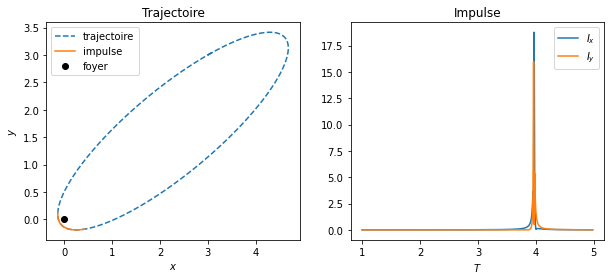

In [ ]:
t = np.arange(t0, tf, tau)
X = odeint(derivee, X0, t)
x = X[:,0] 
y = X[:,1]
vx = X[:,2] # values at any given time index
vy = X[:,3]

diff_t = 1000
ttf = int(5e5)
tti = int(1e5)

delta_t = np.arange(tti,ttf,diff_t)
dif_x, dif_y, times = get_impulse(vx,vy,delta_t)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.plot(x,y,'--',label='trajectoire')
ax1.plot(x[times[0]:times[len(times)-1]],y[times[0]:times[len(times)-1]],label='impulse')

ax1.plot(0.,0.,'ko', label='foyer')
ax1.set_title('Trajectoire')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.plot(delta_t[:len(delta_t) - 1] * tau, dif_x, label='$I_x$')
ax2.plot(delta_t[:len(delta_t) - 1] * tau, dif_y, label='$I_y$')

ax2.set_title('Impulse')
ax2.set_xlabel('$T$')

ax1.legend()
ax2.legend()

plt.show()


La partie orange visible sur l'orbite elliptique représente le moment où la vitesse varie du fait de sa position proche du foyer. 

On voit également, d'après la représentation de l'impulsion, que celle-ci est négligeable. En effet, sa variation au cours du temps est plus faible comparé à la variation de la vitesse. 

## 4 - Conclusion 

Les lois de Newton et Kepler ont permis d'étudier la trajectoire elliptique d'un satellite autour de la Terre. Pour modéliser cette trajectoire, nous avons utilisé trois méthodes de résolution numérique d'équation différentielle : Odeint, Euler et RK4. Finalement, la méthode odeint est notre méthode de résolution de référence du fait de sa précision numérique.        
Le calcul de l'excentricité à permis de confirmer le caractère elliptique de la trajectoire en obtenant des valeurs, pour l'excentricité, comprises 0 et 1. 

L'analyse de la vitesse et de l'impulsion nous ont permis de conclure qu'une force de propulsion ne peut pas modifier la vitesse du satellite sur un intervalle de temps donné.  

